IMPORTING NECESSARY PACKAGES AND LIBRARIES


In [ ]:
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

CHECKING THE SUBFOLDERS

In [ ]:
os.listdir("/content/drive/MyDrive/N_B/TRAIN")

['N', 'B']

In [ ]:
os.listdir("/content/drive/MyDrive/N_B/TEST")

['N', 'B']

READING AND RESIZING THE IMAGE

In [ ]:
trainpath="/content/drive/MyDrive/N_B/TRAIN"

In [ ]:
X_train=[]
y_train=[]
catgories=['N', 'B']
for i in catgories:
  subdirpath=os.path.join(trainpath,i)
  img=os.listdir(subdirpath)
  for j in img:
    img_path=os.path.join(subdirpath,j)
    img_array=imread(img_path)
    img_resize=resize(img_array,(150,150,1))
    X_train.append(img_resize)
    y_train.append(catgories.index(i))
  print("Loaded.....",i)

Loaded..... N
Loaded..... B


In [ ]:
testpath="/content/drive/MyDrive/N_B/TEST"

In [ ]:
X_test=[]
y_test=[]
catgories=['N', 'B']
for i in catgories:
  subdirpath=os.path.join(testpath,i)
  img=os.listdir(subdirpath)
  for j in img:
    img_path=os.path.join(subdirpath,j)
    img_array=imread(img_path)
    img_resize=resize(img_array,(150,150,1))
    X_test.append(img_resize)
    y_test.append(catgories.index(i))
  print("Loaded.....",i)

Loaded..... N
Loaded..... B


CHECKING THE LENGTH

In [ ]:
len(X_train),len(y_train)

(2050, 2050)

In [ ]:
len(X_test),len(y_test)

(1000, 1000)

CONVERTING LIST TO ARRAY


In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train.shape

(2050, 150, 150, 1)

CNN-MODEL

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,1)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(2,activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=16)

Epoch 1/20
129/129 [==============================] - 5s 12ms/step - loss: 0.8143 - accuracy: 0.6380
Epoch 2/20
129/129 [==============================] - 1s 11ms/step - loss: 0.4773 - accuracy: 0.7800
Epoch 3/20
129/129 [==============================] - 1s 11ms/step - loss: 0.3385 - accuracy: 0.8629
Epoch 4/20
129/129 [==============================] - 2s 13ms/step - loss: 0.2274 - accuracy: 0.9259
Epoch 5/20
129/129 [==============================] - 2s 13ms/step - loss: 0.1401 - accuracy: 0.9605
Epoch 6/20
129/129 [==============================] - 2s 13ms/step - loss: 0.0922 - accuracy: 0.9756
Epoch 7/20
129/129 [==============================] - 2s 13ms/step - loss: 0.0672 - accuracy: 0.9859
Epoch 8/20
129/129 [==============================] - 2s 12ms/step - loss: 0.0374 - accuracy: 0.9932
Epoch 9/20
129/129 [==============================] - 2s 12ms/step - loss: 0.0252 - accuracy: 0.9971
Epoch 10/20
129/129 [==============================] - 1s 11ms/step - loss: 0.0153 - accura

In [ ]:
model.evaluate(X_test,y_test)

32/32 [==============================] - 1s 9ms/step - loss: 1.2552 - accuracy: 0.7570


[1.2552064657211304, 0.7570000290870667]

PREDICTING

array([[[ 98,  98,  98],
        [100, 100, 100],
        [105, 105, 105],
        ...,
        [115, 114, 110],
        [113, 112, 108],
        [111, 110, 106]],

       [[122, 122, 122],
        [132, 132, 132],
        [149, 149, 149],
        ...,
        [113, 112, 108],
        [111, 110, 106],
        [109, 108, 104]],

       [[163, 163, 163],
        [168, 168, 168],
        [175, 175, 175],
        ...,
        [114, 113, 111],
        [111, 110, 108],
        [109, 108, 106]],

       ...,

       [[166, 165, 160],
        [166, 165, 160],
        [166, 165, 160],
        ...,
        [147, 118,  84],
        [145, 119,  84],
        [145, 119,  84]],

       [[166, 165, 160],
        [166, 165, 160],
        [166, 165, 160],
        ...,
        [147, 118,  84],
        [146, 120,  85],
        [146, 120,  85]],

       [[166, 165, 160],
        [166, 165, 160],
        [166, 165, 160],
        ...,
        [148, 119,  85],
        [146, 120,  85],
        [146, 120,  85]]], dtype=uint8)
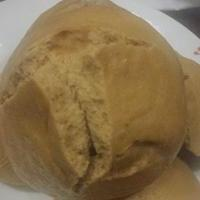

In [ ]:
imgpath="/content/drive/MyDrive/N_B/TRAIN/B/TEST_BIODEG_HFL_110.jpg"
img=imread(imgpath)
img

In [ ]:
img=resize(img,(150,150,1))

In [ ]:
img=img.reshape(1,150,150,1)

In [ ]:
y_pred=model.predict(img)
y_pred

1/1 [==============================] - 0s 226ms/step


array([[0.01016176, 0.6150449 ]], dtype=float32)

In [ ]:
y_new=np.argmax(y_pred,axis=1)
y_new


array([1])

In [ ]:
catgories[y_new.item()]


'B'